<a href="https://colab.research.google.com/github/deuche/common-components/blob/master/Cubix_ML_Engineer_Handling_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data_path = "data/horse-colic.data"
df = pd.read_csv(data_path, header=None, delim_whitespace=True)

In [ ]:
# ? are replaced by nans
df = df.replace('?', np.nan)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,55,65,NaN,NaN,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,NaN,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,NaN,NaN,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


In [ ]:
# Rename columns
list_column_names = ["V" + str(i) for i in range(1, 29)]
df.columns = list_column_names

In [ ]:
df.dtypes

V1     object
V2      int64
V3      int64
V4     object
V5     object
V6     object
V7     object
V8     object
V9     object
V10    object
V11    object
V12    object
V13    object
V14    object
V15    object
V16    object
V17    object
V18    object
V19    object
V20    object
V21    object
V22    object
V23    object
V24     int64
V25     int64
V26     int64
V27     int64
V28     int64
dtype: object

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,55,65,NaN,NaN,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,NaN,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,NaN,NaN,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


# Determine quantitative_columns and qualitative columns

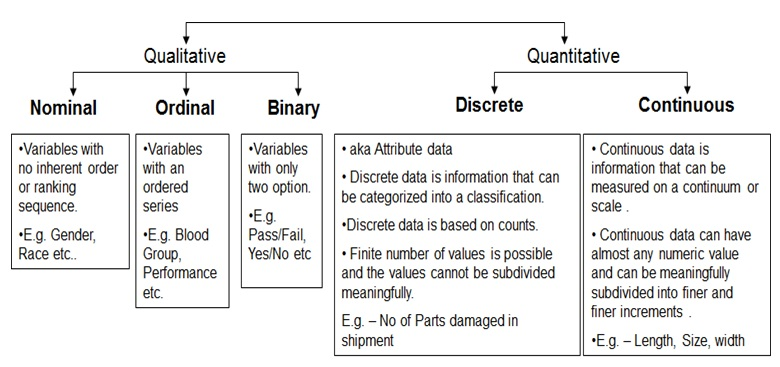

https://stats.stackexchange.com/questions/159902/is-nominal-ordinal-binary-for-quantitative-data-qualitative-data-or-both

In [ ]:
df["V3"].value_counts()

V3
532349     2
528151     2
5279822    2
528469     2
529424     2
          ..
533696     1
5297379    1
533736     1
534963     1
534618     1
Name: count, Length: 284, dtype: int64

<Axes: >

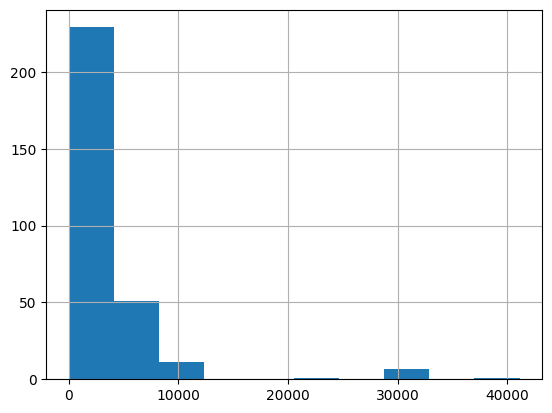

In [ ]:
df["V25"].astype(float).hist()

In [ ]:
quantitative_columns = ['V4', 'V5', 'V6', 'V16',
                     'V19', 'V20', 'V22']

qualitative_columns = ['V1', 'V2', 'V3', 'V7', 'V8', 'V9',
                       'V10', 'V11', 'V12', 'V13',
                       'V14', 'V15', 'V17', 'V18',
                       'V21', 'V23', 'V25',
                       'V26', 'V27', 'V28']

# Handling V25 column based on the description

In [ ]:
df["V25"].value_counts()

V25
0        56
3111     33
3205     29
2208     20
2205     13
         ..
5205      1
2305      1
5000      1
7400      1
11300     1
Name: count, Length: 61, dtype: int64

In [ ]:
def create_new_features(df, col_name):
  """
  We want to save components of V25, V26 and V27 into columns based on
  the following information:
  V25,V26,V27: type of lesion
          - first number is site of lesion
               1 = gastric
               2 = sm intestine
               3 = lg colon
               4 = lg colon and cecum
               5 = cecum
               6 = transverse colon
               7 = retum/descending colon
               8 = uterus
               9 = bladder
               11 = all intestinal sites
               00 = none
          - second number is type
               1 = simple
               2 = strangulation
               3 = inflammation
               4 = other
          - third number is subtype
               1 = mechanical
               2 = paralytic
               0 = n/a
          - fourth number is specific code
               1 = obturation
               2 = intrinsic
               3 = extrinsic
               4 = adynamic
               5 = volvulus/torsion
               6 = intussuption
               7 = thromboembolic
               8 = hernia
               9 = lipoma/slenic incarceration
               10 = displacement
               0 = n/a
  """
  modified_col_name = f"{col_name}_modified"
  df[modified_col_name] = df[col_name].apply(lambda x: str(x)
                                      if pd.notna(x) and len(str(x)) > 3
                                      else None)

  # Create new features based on the description in hourse-colic.names.original
  df[f"{col_name}_lesion_site"] = df[modified_col_name].apply(lambda x: int(x[:2])
                                              if x and x[:2] in ['00', '11']
                                              else int(x[0])
                                              if x else None)
  df[f"{col_name}_type"] = df[modified_col_name].apply(lambda x: int(x[2])
                                        if x and x[:2] in ['00', '11']
                                        else int(x[1])
                                        if x else None)
  df[f"{col_name}_subtype"] = df[modified_col_name].apply(lambda x: int(x[3])
                                            if x and x[:2] in ['00', '11']
                                          else int(x[2])
                                          if x else None)
  df[f"{col_name}_specific_code"] = df[modified_col_name].apply(lambda x: int(x[4:])
                                                if x and len(x) > 4 and x[3:] != '10'
                                                else int(x[3:])
                                                if x and len(x) > 3
                                                else None)

  df = df.drop(columns=[modified_col_name])
  return df

In [ ]:
df = create_new_features(df, "V25")
df = create_new_features(df, "V26")
df = create_new_features(df, "V27")

In [ ]:
df.loc[df["V25_specific_code"] == 10][["V25", "V25_specific_code"]]

,V25,V25_specific_code
105,31110,10.0
126,31110,10.0
186,21110,10.0
189,31110,10.0
203,31110,10.0
245,41110,10.0
269,31110,10.0
285,31110,10.0
292,31110,10.0


In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25_subtype,V25_specific_code,V26_lesion_site,V26_type,V26_subtype,V26_specific_code,V27_lesion_site,V27_type,V27_subtype,V27_specific_code
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,530334,38.30,40,24,1,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,9,5290409,39.10,164,84,4,1,6,2,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,2,1,527702,37.20,72,24,3,2,4,2,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,1,1,529386,37.50,72,30,4,3,4,1,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,1,1,530612,36.50,100,24,3,3,3,1,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter columns that contain "V25", "V26", or "V27" in their names
columns_to_show = [col for col in df.columns if "V25" in col or "V26" in col or "V27" in col]

# Display only the filtered columns
filtered_df = df[columns_to_show]
filtered_df


,V25,V26,V27,V25_lesion_site,V25_type,V25_subtype,V25_specific_code,V26_lesion_site,V26_type,V26_subtype,V26_specific_code,V27_lesion_site,V27_type,V27_subtype,V27_specific_code
0,11300,0,0,11.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2208,0,0,2.0,2.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2208,0,0,2.0,2.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4300,0,0,4.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3205,0,0,3.0,2.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,2208,0,0,2.0,2.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,3205,0,0,3.0,2.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,2208,0,0,2.0,2.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df["V26"].value_counts()

V26
0       293
3111      3
1400      1
7111      1
6112      1
3112      1
Name: count, dtype: int64

In [ ]:
df["V26_lesion_site"].value_counts()

V26_lesion_site
3.0    4
1.0    1
7.0    1
6.0    1
Name: count, dtype: int64

# Imputate missing values

In [ ]:
for col in columns_to_show:
    df[col].fillna(-1, inplace=True) # imputing nan values  with -1 in columns_to_show

In [ ]:
for col in qualitative_columns:
    df[col].fillna(df[col].mode()[0], inplace=True) # imputing nan values with mode for qualitative columns

In [ ]:
df[quantitative_columns] = df[quantitative_columns].astype(float)

In [ ]:
for col in quantitative_columns:
    df[col].fillna(df[col].mean(), inplace=True) # imputing nan values with mean for quantitative columns

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25_subtype,V25_specific_code,V26_lesion_site,V26_type,V26_subtype,V26_specific_code,V27_lesion_site,V27_type,V27_subtype,V27_specific_code
0,2,1,530101,38.500000,66.0,28.0,3,3,1,2,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,1,534817,39.200000,88.0,20.0,3,1,4,1,...,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2,1,530334,38.300000,40.0,24.0,1,1,3,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,9,5290409,39.100000,164.0,84.0,4,1,6,2,...,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,2,1,530255,37.300000,104.0,35.0,3,1,6,2,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,38.167917,120.0,70.0,4,1,4,2,...,0.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
296,2,1,527702,37.200000,72.0,24.0,3,2,4,2,...,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
297,1,1,529386,37.500000,72.0,30.0,4,3,4,1,...,0.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
298,1,1,530612,36.500000,100.0,24.0,3,3,3,1,...,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
filtered_df = df[columns_to_show]
filtered_df

,V25,V26,V27,V25_lesion_site,V25_type,V25_subtype,V25_specific_code,V26_lesion_site,V26_type,V26_subtype,V26_specific_code,V27_lesion_site,V27_type,V27_subtype,V27_specific_code
0,11300,0,0,11.0,3.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2208,0,0,2.0,2.0,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,2208,0,0,2.0,2.0,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,4300,0,0,4.0,3.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3205,0,0,3.0,2.0,0.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
296,2208,0,0,2.0,2.0,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
297,3205,0,0,3.0,2.0,0.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
298,2208,0,0,2.0,2.0,0.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Detecting and handling outliers

In [ ]:
from scipy import stats

for col in quantitative_columns:
    # Calculate Z-score values for the column
    df[col + '_zscore'] = stats.zscore(df[col])

    # Assuming that outliers are indicated by absolute Z-scores greater than 3
    outlier_indices = df[abs(df[col + '_zscore']) > 3].index

    # Replace outliers with the median of the column
    mean_value = df[col].mean()
    original_outlier_values = df.iloc[outlier_indices][col]
    df.loc[outlier_indices, col] = mean_value

    # Drop the Z-score column as it's no longer needed
    df.drop(columns=[col + '_zscore'], inplace=True)

In [ ]:
original_outlier_values # before handling outliers

31      7.4
33      6.6
71      7.0
113    10.0
143     7.0
211    10.1
225     8.0
284     7.0
Name: V22, dtype: float64

In [ ]:
outlier_indices

Index([31, 33, 71, 113, 143, 211, 225, 284], dtype='int64')

In [ ]:
df[col].iloc[outlier_indices] # after handling outliers

31     3.019608
33     3.019608
71     3.019608
113    3.019608
143    3.019608
211    3.019608
225    3.019608
284    3.019608
Name: V22, dtype: float64

<Axes: >

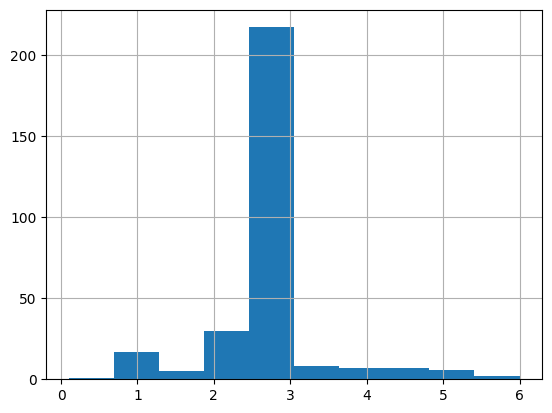

In [ ]:
df[col].astype(float).hist()

# Scaling

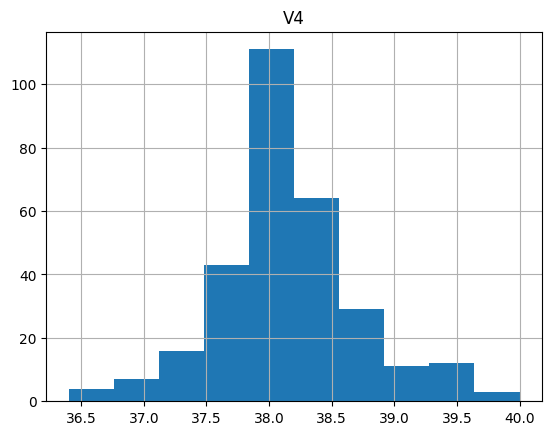

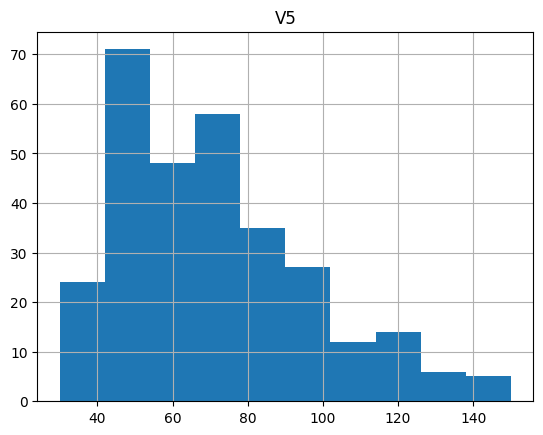

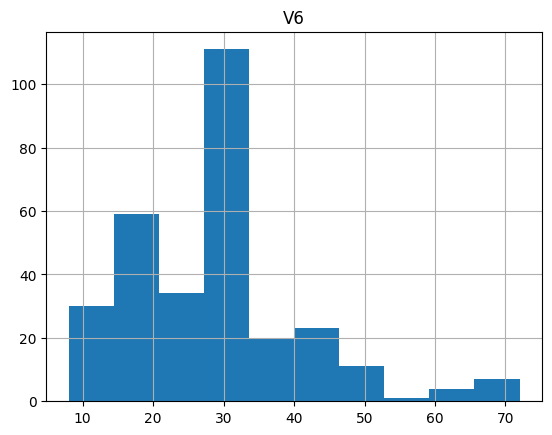

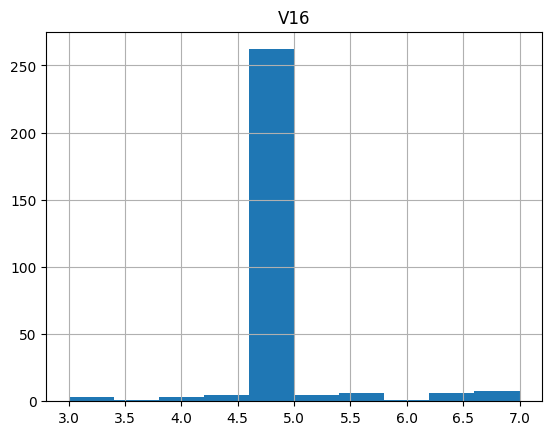

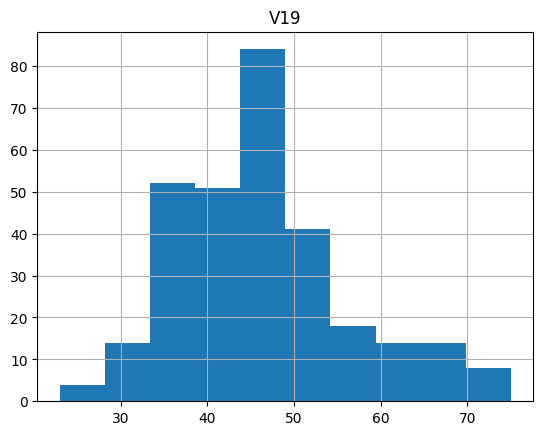

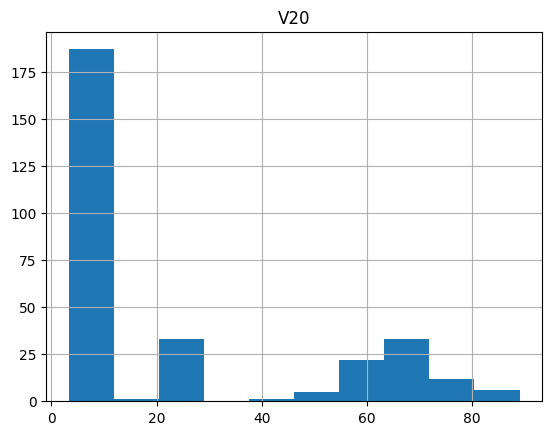

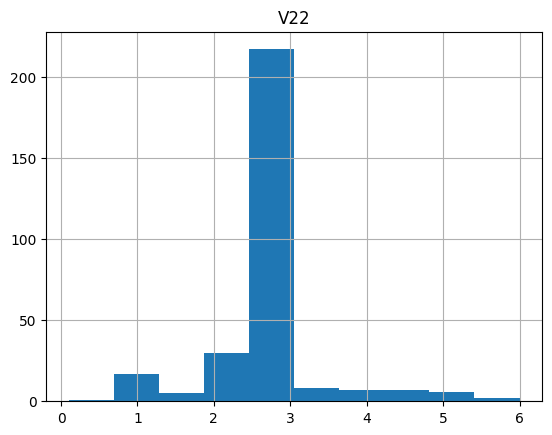

In [ ]:
import matplotlib.pyplot as plt

# Check the histogram of quantitative columns
for col in quantitative_columns:
    df[col].hist()
    plt.title(col)
    plt.show()

In [ ]:
# Check whether the column is bell shaped or not
bell_curve_type_columns = ["V4", "V19"]
not_bell_curve_type_columns = ["V16", "V20", "V22"]

# One Hot Encoding

In [ ]:
# OneHot Encoding for ML - for qualitative columns
onehot_encoders = {} # we save encoders into this and will export this into file
new_columns = []

for col in qualitative_columns:
    encoder = OneHotEncoder(sparse_output=False)
    new_data = encoder.fit_transform(df[col].to_numpy().reshape(-1, 1)) # fitting encoder and applying for the data

    new_columns.extend(encoder.get_feature_names_out([col]))

    new_df = pd.DataFrame(new_data, columns=encoder.get_feature_names_out([col]))
    df = pd.concat([df, new_df], axis=1)

    onehot_encoders[col] = encoder

In [ ]:
df.drop(columns=qualitative_columns, inplace=True)

In [ ]:
df

,V4,V5,V6,V16,V19,V20,V22,V24,V25_lesion_site,V25_type,...,V26_0,V26_1400,V26_3111,V26_3112,V26_6112,V26_7111,V27_0,V27_2209,V28_1,V28_2
0,38.500000,66.000000,28.000000,4.707547,45.0,8.400000,3.019608,2,11.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,39.200000,88.000000,20.000000,4.707547,50.0,85.000000,2.000000,2,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,38.300000,40.000000,24.000000,4.707547,33.0,6.700000,3.019608,2,-1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,39.100000,71.913043,30.417355,5.000000,48.0,7.200000,5.300000,1,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,37.300000,104.000000,35.000000,4.707547,74.0,7.400000,3.019608,2,4.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,38.167917,120.000000,70.000000,4.707547,55.0,65.000000,3.019608,2,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
296,37.200000,72.000000,24.000000,4.707547,44.0,24.456929,3.300000,1,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
297,37.500000,72.000000,30.000000,4.707547,60.0,6.800000,3.019608,1,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
298,36.500000,100.000000,24.000000,4.707547,50.0,6.000000,3.400000,1,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
len(df) == len(df.dropna())

True

In [ ]:
df.max().max()

150.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min max scaling for every column
min_max_scaler_list = []
for col in df.columns:
    min_max_scaler = MinMaxScaler()
    df[col] = min_max_scaler.fit_transform(df[[col]])
    min_max_scaler_list.append(min_max_scaler)

In [ ]:
df

,V4,V5,V6,V16,V19,V20,V22,V24,V25_lesion_site,V25_type,...,V26_0,V26_1400,V26_3111,V26_3112,V26_6112,V26_7111,V27_0,V27_2209,V28_1,V28_2
0,0.583333,0.300000,0.312500,0.426887,0.423077,0.059510,0.494849,1.0,1.000000,0.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.777778,0.483333,0.187500,0.426887,0.519231,0.953326,0.322034,1.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.527778,0.083333,0.250000,0.426887,0.192308,0.039673,0.494849,1.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.750000,0.349275,0.350271,0.500000,0.480769,0.045508,0.881356,0.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.250000,0.616667,0.421875,0.426887,0.980769,0.047841,0.494849,1.0,0.416667,0.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.491088,0.750000,0.968750,0.426887,0.615385,0.719953,0.494849,1.0,0.333333,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
296,0.222222,0.350000,0.250000,0.426887,0.403846,0.246872,0.542373,0.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
297,0.305556,0.350000,0.343750,0.426887,0.711538,0.040840,0.494849,0.0,0.333333,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
298,0.027778,0.583333,0.250000,0.426887,0.519231,0.031505,0.559322,0.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df.max().max()

1.0

In [ ]:
df.min().min()

0.0

# Save df and label encoder objects

In [ ]:
from pathlib import Path

# Creating folders
def create_new_folder(folder):
    Path(folder).mkdir(parents=True, exist_ok=True)

folder = 'artifacts/encoders'
create_new_folder(folder)

folder = 'artifacts/preprocessed_data'
create_new_folder(folder)

In [ ]:
import pickle

with open('artifacts/encoders/onehot_encoders.pkl', 'wb') as file:  # 'wb' means "write binary" way
    pickle.dump(onehot_encoders, file)

with open('artifacts/encoders/min_max_scaler.pkl', 'wb') as file:  # 'wb' means "write binary" way
    pickle.dump(min_max_scaler_list, file)

In [ ]:
df.to_csv('artifacts/preprocessed_data/saved_dataframe_new.csv', index=False)

In [ ]:
df

,V4,V5,V6,V16,V19,V20,V22,V24,V25_lesion_site,V25_type,...,V26_0,V26_1400,V26_3111,V26_3112,V26_6112,V26_7111,V27_0,V27_2209,V28_1,V28_2
0,0.583333,0.300000,0.312500,0.426887,0.423077,0.059510,0.494849,1.0,1.000000,0.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.777778,0.483333,0.187500,0.426887,0.519231,0.953326,0.322034,1.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.527778,0.083333,0.250000,0.426887,0.192308,0.039673,0.494849,1.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.750000,0.349275,0.350271,0.500000,0.480769,0.045508,0.881356,0.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.250000,0.616667,0.421875,0.426887,0.980769,0.047841,0.494849,1.0,0.416667,0.8,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.491088,0.750000,0.968750,0.426887,0.615385,0.719953,0.494849,1.0,0.333333,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
296,0.222222,0.350000,0.250000,0.426887,0.403846,0.246872,0.542373,0.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
297,0.305556,0.350000,0.343750,0.426887,0.711538,0.040840,0.494849,0.0,0.333333,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
298,0.027778,0.583333,0.250000,0.426887,0.519231,0.031505,0.559322,0.0,0.250000,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
